In [1]:
import pandas as pd
data = pd.read_csv('giletjaune.csv',encoding='latin-1')
data.head()

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet,sentiment
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ...",NaN,NaN,NaN,NaN,NaN
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @...",NaN,NaN,NaN,NaN,NaN
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof...",NaN,NaN,NaN,NaN,NaN
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn...",NaN,NaN,NaN,NaN,NaN
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ...",NaN,NaN,NaN,NaN,NaN


## Data Cleaning Phase

In [2]:
new_df=data['Date-Time'].str.split(",", n =4, expand = True,) 

In [3]:
new_df=new_df.dropna()

In [4]:
new_df =new_df.drop([22,35])

In [5]:
new_df.head()

,0,1,2,3,4
0,12-03-18 07:30,10thCrusader,5.64,4.64,"""By the time Petit Macron gets back to Paris, ..."
1,12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,"""RT @Keziadventure: Quick visit to the #ArcDeT..."
2,12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhoftwat Good time for @MayorofLondon to...
3,12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenney: #GiletJaune protestors beating ...
4,12-04-18 01:06,alown6666,5.60,4.14,"""@RusoAzul It was more like a contract between..."


In [6]:
df=new_df.rename(columns={0: "Date-Time", 1: "Twitter handle", 2: "Pleasure", 3: "Arousal", 4: "Tweet/Sentiment"})

In [7]:
df.head()

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet/Sentiment
0,12-03-18 07:30,10thCrusader,5.64,4.64,"""By the time Petit Macron gets back to Paris, ..."
1,12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,"""RT @Keziadventure: Quick visit to the #ArcDeT..."
2,12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhoftwat Good time for @MayorofLondon to...
3,12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenney: #GiletJaune protestors beating ...
4,12-04-18 01:06,alown6666,5.60,4.14,"""@RusoAzul It was more like a contract between..."


In [8]:
df["Tweet/Sentiment"][0]

'"By the time Petit Macron gets back to Paris, he\'ll be browning his trousers,Neutral;'

In [9]:
ts=df["Tweet/Sentiment"].str.split(",N|,P|,Neu",n=1,expand = True) 

In [10]:
ts =ts.replace({'eutral;':'Neutral','ositive;':'Positive','egative;':'Negative','osistive;':'Positive','egative;':'Negative',
                'egative ";':'Negative','eutral"':'Neutral','egative";':'Negative','egative ;':'Negative'})

In [11]:
ts =ts.rename(columns={0:"Tweet",1:"Sentiment"})

In [12]:
ts = ts.dropna()

In [109]:
new_ts =ts.drop([8,15,21])

In [96]:
new_ts.head()

,Tweet,Sentiment
0,"""By the time Petit Macron gets back to Paris, ...",Neutral
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive
3,RT @joepenney: #GiletJaune protestors beating ...,Negative
4,"""@RusoAzul It was more like a contract between...",Negative
5,"""As part francophone, way to make the #GiletJa...",Negative


In [15]:
df=df.drop(columns='Tweet/Sentiment')

In [16]:
df=df.join(new_ts)

In [17]:
df=df.dropna()

In [18]:
df

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet,Sentiment
0,12-03-18 07:30,10thCrusader,5.64,4.64,"""By the time Petit Macron gets back to Paris, ...",Neutral
1,12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive
3,12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenney: #GiletJaune protestors beating ...,Negative
4,12-04-18 01:06,alown6666,5.60,4.14,"""@RusoAzul It was more like a contract between...",Negative
5,12-03-18 07:53,andrew_ed_ba,5.83,3.86,"""As part francophone, way to make the #GiletJa...",Negative
7,12-04-18 02:54,Antibullshit12,5.07,4.54,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative
9,12-02-18 17:31,AxelHuynh,4.69,4.45,"""TODAY, A SYMBOL OF REPUBLIC & FREEDOM HAS BEE...",Positive
11,12-02-18 06:56,bizcom,6.37,4.22,Hi @NATO could you confirm this guy is member ...,Negative
12,12-03-18 04:49,bursuk,5.07,4.54,"""RT @TickT0Tack: 1/3 The Battle For Paris! Yel...",Negative
13,12-03-18 01:18,CarstenGerhardt,6.01,4.08,Poweful stuff going on in France ð® #GiletJaune,Positive


## Preprocessing Phase

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jileni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
new_ts.head(10)

,Tweet,Sentiment
0,"""By the time Petit Macron gets back to Paris, ...",Neutral
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive
3,RT @joepenney: #GiletJaune protestors beating ...,Negative
4,"""@RusoAzul It was more like a contract between...",Negative
5,"""As part francophone, way to make the #GiletJa...",Negative
7,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative
9,"""TODAY, A SYMBOL OF REPUBLIC & FREEDOM HAS BEE...",Positive
11,Hi @NATO could you confirm this guy is member ...,Negative
12,"""RT @TickT0Tack: 1/3 The Battle For Paris! Yel...",Negative
13,Poweful stuff going on in France ð® #GiletJaune,Positive


In [47]:
new_ts.Sentiment.value_counts()

Negative    22
Positive    10
Neutral      6
Name: Sentiment, dtype: int64

In [110]:
new_ts['pre_clean_len'] = [len(t) for t in new_ts.Tweet]

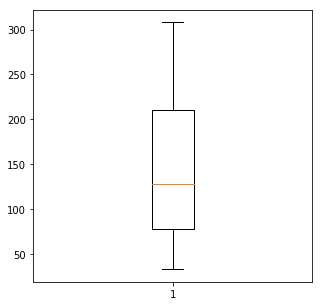

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(new_ts.pre_clean_len)
plt.show()

la limite des caractères pour Twitter est 140 mais étrangement quelques tweets on bien plus de caractères que celà .

In [111]:
new_ts[new_ts.pre_clean_len > 140].head(10)

,Tweet,Sentiment,pre_clean_len
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive,262
5,"""As part francophone, way to make the #GiletJa...",Negative,203
11,Hi @NATO could you confirm this guy is member ...,Negative,246
14,"""The point of theÂ gilet jauneÂ is to ensure i...",Positive,231
16,"""@DoctorKropotkin @BethLynch2020 @VryKranky Mi...",Negative,272
17,"""Also the antifas on this video trying to hack...",Negative,251
24,#WorldAIDSDay #AIDS #ActUp #Paris #PlaceDeLaCo...,Positive,176
25,"""RT @HeloisePatricia: I almost feel sorry for ...",Negative,176
27,"""RT @Unjum_Mirza: #Metro this morning: #France...",Negative,296
29,Guys donât worry while all the demonstration...,Positive,150


In [101]:
new_ts

,Tweet,Sentiment,pre_clean_len
0,"""By the time Petit Macron gets back to Paris, ...",Neutral,76
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive,262
3,RT @joepenney: #GiletJaune protestors beating ...,Negative,112
4,"""@RusoAzul It was more like a contract between...",Negative,118
5,"""As part francophone, way to make the #GiletJa...",Negative,203
7,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative,79
9,"""TODAY, A SYMBOL OF REPUBLIC & FREEDOM HAS BEE...",Positive,55
11,Hi @NATO could you confirm this guy is member ...,Negative,246
12,"""RT @TickT0Tack: 1/3 The Battle For Paris! Yel...",Negative,75
13,Poweful stuff going on in France ð® #GiletJaune,Positive,49


### Eliminer les tweets neutres

In [112]:
new_ts=new_ts.drop(new_ts[new_ts['Sentiment']=="Neutral"].index)

In [113]:
new_ts.head()

,Tweet,Sentiment,pre_clean_len
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive,262
3,RT @joepenney: #GiletJaune protestors beating ...,Negative,112
4,"""@RusoAzul It was more like a contract between...",Negative,118
5,"""As part francophone, way to make the #GiletJa...",Negative,203
7,"""RT @Antibullshit12: 1/3 The Battle For Paris!...",Negative,79


In [111]:
#Ponctuation

In [64]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
dt= pd.DataFrame()
new_ts['Tweet'] = new_ts['Tweet'].apply(lambda x: remove_punct(x))
new_ts.head(10)

,Tweet,Sentiment,pre_clean_len
1,RT Keziadventure Quick visit to the ArcDeTriom...,Positive,262
3,RT joepenney GiletJaune protestors beating pol...,Negative,112
4,RusoAzul It was more like a contract between t...,Negative,118
5,As part francophone way to make the GiletJaune...,Negative,203
7,RT Antibullshit The Battle For Paris Yellow V...,Negative,79
9,TODAY A SYMBOL OF REPUBLIC FREEDOM HAS BEEN S...,Positive,55
11,Hi NATO could you confirm this guy is member o...,Negative,246
12,RT TickTTack The Battle For Paris Yellow Vest...,Negative,75
13,Poweful stuff going on in France ð® GiletJaune,Positive,49
14,The point of theÂ gilet jauneÂ is to ensure it...,Positive,231


In [62]:
dt

,Tweet
1,RT Keziadventure Quick visit to the ArcDeTriom...
3,RT joepenney GiletJaune protestors beating pol...
4,RusoAzul It was more like a contract between t...
5,As part francophone way to make the GiletJaune...
7,RT Antibullshit The Battle For Paris Yellow V...
9,TODAY A SYMBOL OF REPUBLIC FREEDOM HAS BEEN S...
11,Hi NATO could you confirm this guy is member o...
12,RT TickTTack The Battle For Paris Yellow Vest...
13,Poweful stuff going on in France ð® GiletJaune
14,The point of theÂ gilet jauneÂ is to ensure it...


### Text Cleaning(tokenization/lemmatization/lowercase)

In [80]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

new_ts['Tweet'] = new_ts['Tweet'].apply(lambda x: tweet_cleaner(x.lower()))
new_ts.head()


,Tweet,Sentiment,pre_clean_len
1,rt quick visit to the arcdetriomphe today turn...,Positive,262
3,rt giletjaune protestors beating police out of...,Negative,112
4,it was more like a contract between the two si...,Negative,118
5,as part francophone way to make the giletjaune...,Negative,203
7,rt the battle for paris yellow vest protests c...,Negative,79


In [ ]:
#StopWords

In [81]:
stopword = nltk.corpus.stopwords.words('english','french')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
new_ts['Tweet_nonstop'] = new_ts['Tweet'].apply(lambda x: remove_stopwords(x))
new_ts.head(10)

,Tweet,Sentiment,pre_clean_len,Tweet_nonstop
1,rt quick visit to the arcdetriomphe today turn...,Positive,262,"[r, , q, u, c, k, , v, , , h, e, , r, c, ..."
3,rt giletjaune protestors beating police out of...,Negative,112,"[r, , g, l, e, j, u, n, e, , p, r, e, r, , ..."
4,it was more like a contract between the two si...,Negative,118,"[ , w, , r, e, , l, k, e, , , c, n, r, c, ..."
5,as part francophone way to make the giletjaune...,Negative,203,"[ , p, r, , f, r, n, c, p, h, n, e, , w, , ..."
7,rt the battle for paris yellow vest protests c...,Negative,79,"[r, , h, e, , b, l, e, , f, r, , p, r, , ..."
9,today a symbol of republic freedom has been st...,Positive,55,"[ , , b, l, , f, , r, e, p, u, b, l, c, , ..."
11,hi could you confirm this guy is member of you...,Negative,246,"[h, , c, u, l, , u, , c, n, f, r, , h, , ..."
12,rt the battle for paris yellow vest protests c...,Negative,75,"[r, , h, e, , b, l, e, , f, r, , p, r, , ..."
13,poweful stuff going on in france giletjaune,Positive,49,"[p, w, e, f, u, l, , u, f, f, , g, n, g, , ..."
14,the point of the gilet jaune is to ensure its ...,Positive,231,"[h, e, , p, n, , f, , h, e, , g, l, e, , ..."


### Stemming et Lematisation

In [29]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

new_ts['Tweet_stemmed'] = new_ts['Tweet_nonstop'].apply(lambda x: stemming(x))
new_ts.head()

,Tweet,Sentiment,pre_clean_len,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"""By the time Petit Macron gets back to Paris, ...",Neutral,76,By the time Petit Macron gets back to Paris he...,"[by, the, time, petit, macron, gets, back, to,...","[time, petit, macron, gets, back, paris, hell,...","[time, petit, macron, get, back, pari, hell, b..."
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive,262,RT Keziadventure Quick visit to the ArcDeTriom...,"[rt, keziadventure, quick, visit, to, the, arc...","[rt, keziadventure, quick, visit, arcdetriomph...","[rt, keziadventur, quick, visit, arcdetriomph,..."
3,RT @joepenney: #GiletJaune protestors beating ...,Negative,112,RT joepenney GiletJaune protestors beating pol...,"[rt, joepenney, giletjaune, protestors, beatin...","[rt, joepenney, giletjaune, protestors, beatin...","[rt, joepenney, giletjaun, protestor, beat, po..."
4,"""@RusoAzul It was more like a contract between...",Negative,118,RusoAzul It was more like a contract between t...,"[rusoazul, it, was, more, like, a, contract, b...","[rusoazul, like, contract, two, side, police, ...","[rusoazul, like, contract, two, side, polic, l..."
5,"""As part francophone, way to make the #GiletJa...",Negative,203,As part francophone way to make the GiletJaune...,"[as, part, francophone, way, to, make, the, gi...","[part, francophone, way, make, giletjaune, mov...","[part, francophon, way, make, giletjaun, movem..."


In [30]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

new_ts['Tweet_lemmatized'] = new_ts['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
new_ts.head()

,Tweet,Sentiment,pre_clean_len,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"""By the time Petit Macron gets back to Paris, ...",Neutral,76,By the time Petit Macron gets back to Paris he...,"[by, the, time, petit, macron, gets, back, to,...","[time, petit, macron, gets, back, paris, hell,...","[time, petit, macron, get, back, pari, hell, b...","[time, petit, macron, get, back, paris, hell, ..."
1,"""RT @Keziadventure: Quick visit to the #ArcDeT...",Positive,262,RT Keziadventure Quick visit to the ArcDeTriom...,"[rt, keziadventure, quick, visit, to, the, arc...","[rt, keziadventure, quick, visit, arcdetriomph...","[rt, keziadventur, quick, visit, arcdetriomph,...","[rt, keziadventure, quick, visit, arcdetriomph..."
3,RT @joepenney: #GiletJaune protestors beating ...,Negative,112,RT joepenney GiletJaune protestors beating pol...,"[rt, joepenney, giletjaune, protestors, beatin...","[rt, joepenney, giletjaune, protestors, beatin...","[rt, joepenney, giletjaun, protestor, beat, po...","[rt, joepenney, giletjaune, protestors, beatin..."
4,"""@RusoAzul It was more like a contract between...",Negative,118,RusoAzul It was more like a contract between t...,"[rusoazul, it, was, more, like, a, contract, b...","[rusoazul, like, contract, two, side, police, ...","[rusoazul, like, contract, two, side, polic, l...","[rusoazul, like, contract, two, side, police, ..."
5,"""As part francophone, way to make the #GiletJa...",Negative,203,As part francophone way to make the GiletJaune...,"[as, part, francophone, way, to, make, the, gi...","[part, francophone, way, make, giletjaune, mov...","[part, francophon, way, make, giletjaun, movem...","[part, francophone, way, make, giletjaune, mov..."


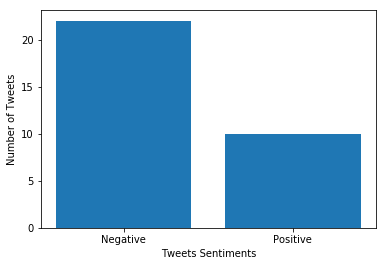

In [41]:
Sentiment_count=new_ts.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Tweet'])
plt.xlabel('Tweets Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

### Feature Genration

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(new_ts['Tweet'])

In [83]:
text_counts

<32x297 sparse matrix of type '<class 'numpy.int64'>'
	with 397 stored elements in Compressed Sparse Row format>

### Split train and test set

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, new_ts['Sentiment'], test_size=0.3, random_state=1)

### Model Building and Evaluation


In [85]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5


### Feature Generation using TF-IDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(new_ts['Tweet'])

In [87]:
text_tf

<32x376 sparse matrix of type '<class 'numpy.float64'>'
	with 605 stored elements in Compressed Sparse Row format>

### Split train and test set (TF-IDF)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, new_ts['Sentiment'], test_size=0.3, random_state=123)

### Model Building and Evaluation (TF-IDF)

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8


In [103]:
dt = new_ts

In [104]:
dt['Tweet'] = dt['Tweet'].apply(lambda x: clean_text(x.lower()))
dt.head()

,Tweet,Sentiment,pre_clean_len
1,"[rt, keziadventur, quick, visit, arcdetriomph,...",Positive,262
3,"[rt, joepenney, giletjaun, protestor, beat, po...",Negative,112
4,"[rusoazul, like, contract, two, side, polic, l...",Negative,118
5,"[part, francophon, way, make, giletjaun, movem...",Negative,203
7,"[rt, antibullshit, battl, pari, yellow, vest, ...",Negative,79


In [93]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [122]:
data

,Tweet,Sentiment,pre_clean_len
1,rt at_user quick visit to the arcdetriomphe to...,Positive,262
3,rt at_user giletjaune protestors beating polic...,Negative,112
4,at_user it was more like a contract between th...,Negative,118
5,"as part francophone, way to make the giletjaun...",Negative,203
7,rt at_user 1/3 the battle for paris! yellow ve...,Negative,79
9,"today, a symbol of republic & freedom has been...",Positive,55
11,hi at_user could you confirm this guy is membe...,Negative,246
12,rt at_user 1/3 the battle for paris! yellow ve...,Negative,75
13,poweful stuff going on in france ð® giletjaune,Positive,49
14,the point of theâ gilet jauneâ is to ensure it...,Positive,231


### WordCloud

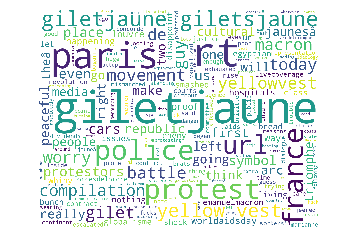

In [131]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words = ' '.join(data['Tweet'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('at_user')
                                and word != ['rt','giletjaune']
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()